In [1]:
# Global Happiness Report Analysis (2015 - 2022)

# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Visualization styles

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Reading CSV files for 2015 to 2022 into a list of dataframes

files = ['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv']
df_list = [pd.read_csv(file) for file in files]

In [14]:
df_list

[         Country                           Region  Happiness Rank  \
 0    Switzerland                   Western Europe               1   
 1        Iceland                   Western Europe               2   
 2        Denmark                   Western Europe               3   
 3         Norway                   Western Europe               4   
 4         Canada                    North America               5   
 ..           ...                              ...             ...   
 153       Rwanda               Sub-Saharan Africa             154   
 154        Benin               Sub-Saharan Africa             155   
 155        Syria  Middle East and Northern Africa             156   
 156      Burundi               Sub-Saharan Africa             157   
 157         Togo               Sub-Saharan Africa             158   
 
      Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
 0              7.587         0.03411                   1.39651  1.34951   
 1    

In [15]:
# Creating a consistent column mapping across years

column_rename_map = {
    'Country': 'Country',
    'Country name': 'Country',
    'Happiness.Score': 'Score',
    'Happiness Score': 'Score',
    'Life Ladder': 'Score',
    'Economy (GDP per Capita)': 'GDP',
    'GDP per capita': 'GDP',
    'Social support': 'Social Support',
    'Family': 'Social Support',
    'Freedom to make life choices': 'Freedom',
    'Freedom': 'Freedom',
    'Healthy life expectancy': 'Healthy Life Expectancy',
    'Health (Life Expectancy)': 'Healthy Life Expectancy',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Corruption'
}

In [16]:
# Adding a 'Year' column

years = list(range(2015, 2023))
cleaned_dfs = []

for i, df in enumerate(df_list):
    df = df.rename(columns = column_rename_map)
    df['Year'] = years[i]
    cleaned_dfs.append(df)

In [17]:
# Concatenating all years into one DataFrame

all_data = pd.concat(cleaned_dfs, ignore_index = True)

In [18]:
# Keeping only the relevant columns

columns_to_keep = ['Country', 'Year', 'Score', 'GDP', 'Social Support', 'Freedom', 'Healthy Life Expectancy', 'Generosity']
data = all_data[columns_to_keep]

In [21]:
# Converting numeric columns to proper types

for col in ['Score', 'GDP', 'Social Support', 'Freedom', 'Healthy Life Expectancy', 'Generosity']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

<ipython-input-21-ea27aeb3f806>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')


In [22]:
for col in ['Score', 'GDP', 'Social Support', 'Freedom', 'Healthy Life Expectancy', 'Generosity']:
    data[col] = data.groupby('Year')[col].transform(lambda x: x.fillna(x.mean()))

<ipython-input-22-ca0eebe48060>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data.groupby('Year')[col].transform(lambda x: x.fillna(x.mean()))


In [23]:
print("Summary statistics:\n")
print(data.describe())

Summary statistics:

              Year       Score         GDP  Social Support      Freedom  \
count  1231.000000  782.000000  627.000000     1084.000000  1084.000000   
mean   2018.450041    5.379018    0.899071        1.004091     0.515936   
std       2.284034    1.127456    0.402485        0.310650     0.221478   
min    2015.000000    2.693000    0.000000        0.000000     0.000000   
25%    2016.000000    4.509750    0.595375        0.805747     0.366948   
50%    2018.000000    5.322000    0.960000        0.948000     0.502269   
75%    2020.000000    6.189500    1.221000        1.247028     0.658436   
max    2022.000000    7.769000    2.096000        1.644000     0.974998   

       Healthy Life Expectancy   Generosity  
count               929.000000  1084.000000  
mean                 21.461296     0.153545  
std                  30.292543     0.167592  
min                   0.000000    -0.300907  
25%                   0.589910     0.064828  
50%                   0.814

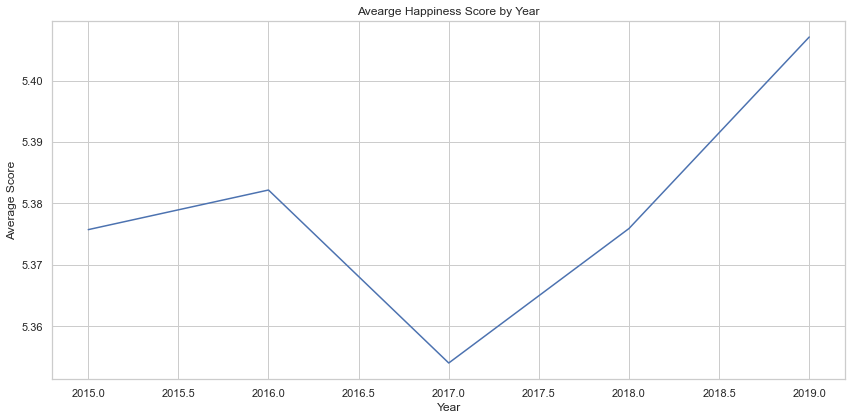

In [24]:
# Visualization
# Average score by Year

plt.figure()
sns.lineplot(x='Year', y='Score', data=data, estimator='mean', ci=None)
plt.title('Avearge Happiness Score by Year')
plt.ylabel('Average Score')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

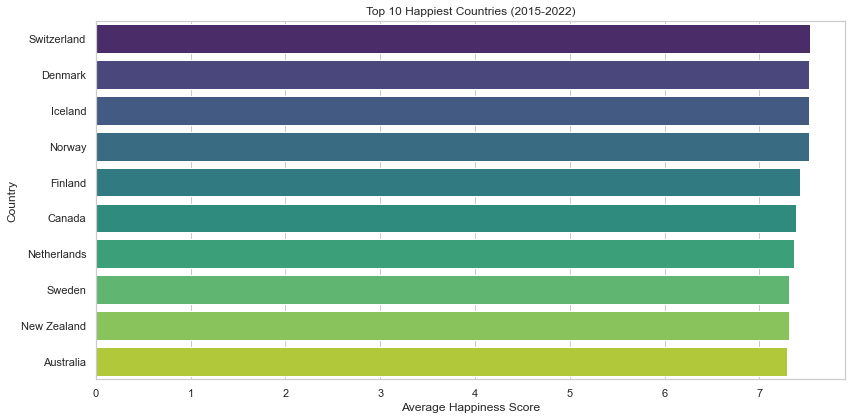

In [27]:
# Top 10 Happiest Countries 

mean_score = data.groupby('Country')['Score'].mean().sort_values(ascending=False).head(10)
plt.figure()
sns.barplot(x=mean_score.values, y=mean_score.index, palette='viridis')
plt.title('Top 10 Happiest Countries (2015-2022)')
plt.xlabel('Average Happiness Score')
plt.tight_layout()
plt.show()

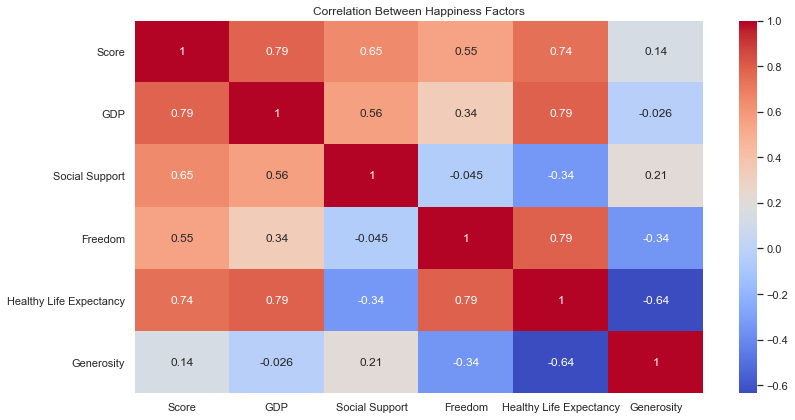

In [28]:
# Correlation heatmap

plt.figure()
sns.heatmap(data.drop(['Country', 'Year'], axis = 1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Happiness Factors')
plt.tight_layout()
plt.show()

In [30]:
# Interactive plot with Plotly: Score vs GDP

fig = px.scatter(data, x='GDP', y='Score', color='Year', hover_name='Country',
                title='GDP vs Happiness Score (2015 - 2022)', trendline='ols')
fig.show()